# Compute the mean ML T/S with MIMOC dataset

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

>> Function definition START

In [2]:
def Arc_Bat(ztype='isol1000') :

        locpath='./'
        locfile='Bathymetry.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['Bathymetry'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=0.5,levels=contours, colors='grey', alpha=0.8)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=3)

        return m, X, Y


In [3]:
def Arc_plot(lon,lat,tab,contours,limits,myticks=None,name=None,zmy_cblab=None,zmy_cmap=None,filename='test.pdf',zvar=None):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')

        if zvar == 'sivolu' or zvar == 'siconc'  or zvar == 'ssh' or zvar == 'FWC' :
                zfontsize=10.
        else:
                zfontsize=6.

        if zvar != 'Bathy' :
                m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
                m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
                m.fillcontinents(color='grey',lake_color='white')

        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])

        if zmy_cmap != None :
                pal = zmy_cmap
        else:
                pal = plt.cm.get_cmap('coolwarm')
                #pal = plt.cm.get_cmap('terrain')

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')
        if zvar == 'ssh':
                CS=m.contour(X, Y, tab, linewidths=0.5, levels=npy.arange(limits[0],limits[1],5.), colors='k', alpha=0.4)

        ############################################################################################################
        ############################################################################################################
        moorplot=1
        if moorplot == 1 :
                bx_ARCB={'name':'B'  ,'lon_min':-150.,'lon_max':-150.,'lat_min':78.,'lat_max':78.}
                bx_ARCM={'name':'M1' ,'lon_min': 125.,'lon_max': 125.,'lat_min':78.,'lat_max':78.}
                bx_EURA={'name':'EUR','lon_min':  60.,'lon_max':  60.,'lat_min':85.,'lat_max':85.}

                All_box=[bx_ARCB,bx_EURA]
                for box in All_box:
                        lats = [box['lat_min'],box['lat_max']]
                        lons = [box['lon_min'],box['lon_max']]
                        x,y = m(lons,lats)
                        m.scatter(x,y,1,marker='o', color='r')
                        #m.plot(x,y,linewidth=2, color='g')
        ############################################################################################################
        ############################################################################################################

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                if zvar == 'votemper' or zvar == 'vosaline' or zvar == 'sivolu' :
                        cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8,drawedges=True)
                else:
                        cbar = plt.colorbar(C,format='%.0f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zmy_cblab,fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)

        plt.title(name,fontsize=zfontsize)

        return

>> Function definition END

In [4]:
# Ref experiment data
DATA_PATH='/data0/project/drakkar/REFERENCE_DATA/MIMOC/MIMOC_ML_v2.2_PT_S/'
ds_mimoc=xr.open_mfdataset(DATA_PATH+'MIMOC_ML_v2.2_PT_S_MLP_month03.nc')
ds_mimoc

<xarray.Dataset>
Dimensions:                            (LAT: 341, LONG: 720)
Dimensions without coordinates: LAT, LONG
Data variables:
    LATITUDE                           (LAT) float32 dask.array<chunksize=(341,), meta=np.ndarray>
    LONGITUDE                          (LONG) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    SALINITY_MIXED_LAYER               (LAT, LONG) float32 dask.array<chunksize=(341, 720), meta=np.ndarray>
    POTENTIAL_TEMPERATURE_MIXED_LAYER  (LAT, LONG) float32 dask.array<chunksize=(341, 720), meta=np.ndarray>
    DEPTH_MIXED_LAYER                  (LAT, LONG) float32 dask.array<chunksize=(341, 720), meta=np.ndarray>

In [5]:
ds_out=xr.Dataset()
ds_out.coords['longitude']=(('lat','lon'),np.tile(ds_mimoc['LONGITUDE'],(ds_mimoc.dims['LAT'],1)))
ds_out.coords['latitude']=(('lat','lon'),np.tile(ds_mimoc['LATITUDE'],(ds_mimoc.dims['LONG'],1)).T)

In [6]:
fldT=np.zeros((12,ds_mimoc.dims['LAT'],ds_mimoc.dims['LONG']))
fldS=np.zeros((12,ds_mimoc.dims['LAT'],ds_mimoc.dims['LONG']))
fldM=np.zeros((12,ds_mimoc.dims['LAT'],ds_mimoc.dims['LONG']))
DATA_PATH='/data0/project/drakkar/REFERENCE_DATA/MIMOC/MIMOC_ML_v2.2_PT_S/'

# Read the original data set
for month in set(np.arange(12)):
    zmm=(f'{month+1:02d}')
    ds_read=xr.open_mfdataset(DATA_PATH+'MIMOC_ML_v2.2_PT_S_MLP_month'+str(zmm)+'.nc')
    fldT[month,:,:]=np.array(ds_read['POTENTIAL_TEMPERATURE_MIXED_LAYER'])
    fldS[month,:,:]=np.array(ds_read['SALINITY_MIXED_LAYER'])
    fldM[month,:,:]=np.array(ds_read['DEPTH_MIXED_LAYER'])
    

In [7]:
ds_out['POTENTIAL_TEMPERATURE_MIXED_LAYER']=(('time','lat','lon'),fldT)
ds_out['SALINITY_MIXED_LAYER']=(('time','lat','lon'),fldS)
ds_out['DEPTH_MIXED_LAYER']=(('time','lat','lon'),fldM)


In [8]:
ds_out

<xarray.Dataset>
Dimensions:                            (lat: 341, lon: 720, time: 12)
Coordinates:
    longitude                          (lat, lon) float32 0.0 0.5 ... 359.5
    latitude                           (lat, lon) float32 -80.0 -80.0 ... 90.0
Dimensions without coordinates: lat, lon, time
Data variables:
    POTENTIAL_TEMPERATURE_MIXED_LAYER  (time, lat, lon) float64 nan ... -1.716
    SALINITY_MIXED_LAYER               (time, lat, lon) float64 nan ... 31.35
    DEPTH_MIXED_LAYER                  (time, lat, lon) float64 nan ... 32.14

In [13]:
ds_out.attrs['History']='MIMOC data used from /data0/project/drakkar/REFERENCE_DATA/MIMOC/MIMOC_ML_v2.2_PT_S/ and files MIMOC_ML_v2.2_PT_S_MLP_month??.nc'

In [14]:
ds_out.to_netcdf(DATA_PATH+'MIMOC_ML_v2.2_PT_S_MLP_Clim.nc')

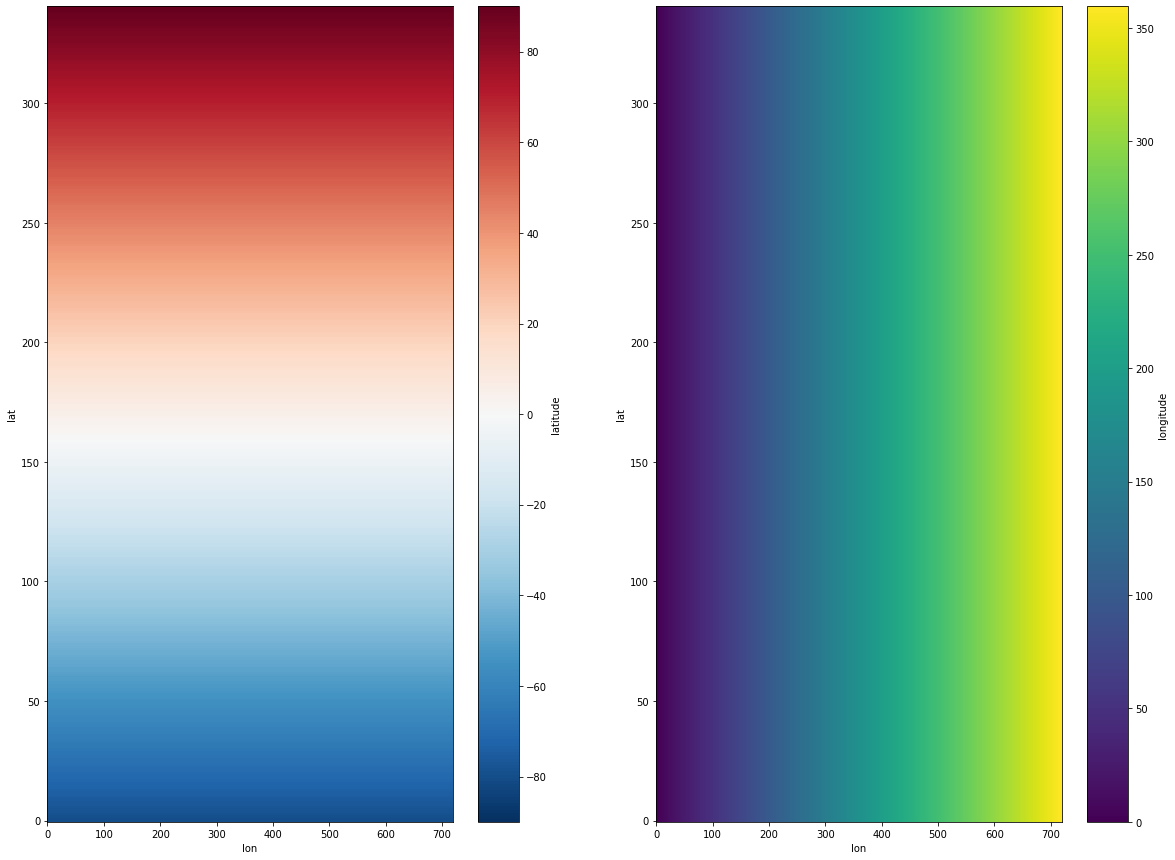

In [9]:
plt.figure(figsize=(20,15))

plt.subplot(121)
ds_out['latitude'].plot()

plt.subplot(122)
ds_out['longitude'].plot()

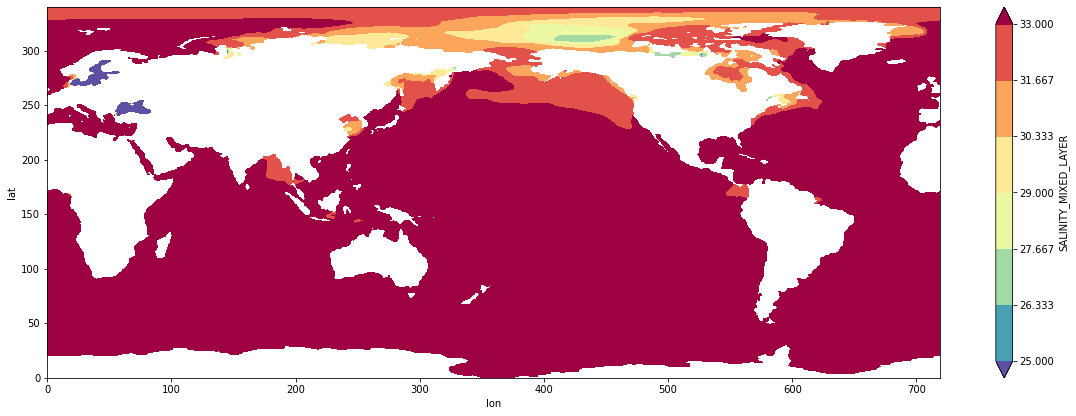

In [10]:
plt.figure(figsize=(20,15))

plt.subplot(211)
ds_out['SALINITY_MIXED_LAYER'].isel(time=4).plot.contourf(cmap='Spectral_r',vmin=25,vmax=33)

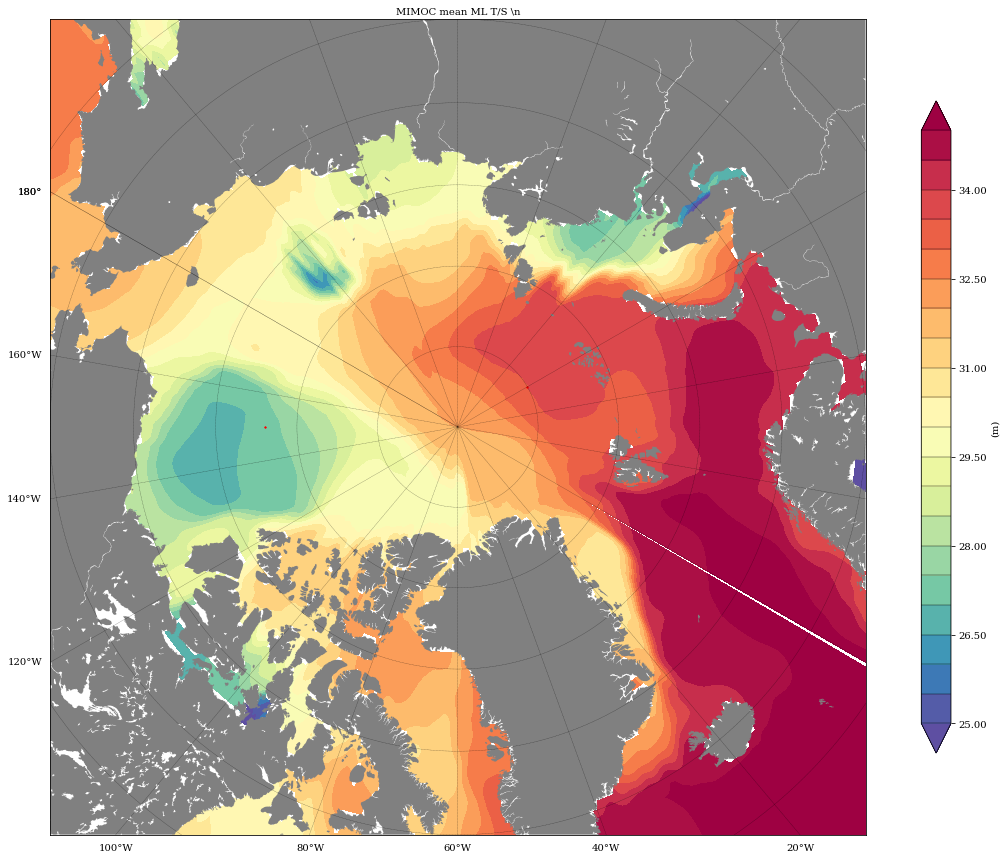

In [12]:
doplot=True
if doplot:
        plt.figure(figsize=(20,15))
        ######### SEA-ICE VOLUME #########
        my_cblab=r'(m)'
        my_cmap=plt.cm.get_cmap('Spectral_r')
        #my_cmap=plt.cm.get_cmap('Blues')

        zMyvar='sivolu'
        m_alpha=1.
        zfile_ext='_MIMOC_TSMLClim_'
        ztitle=r'MIMOC mean ML T/S \n'
        vmin=25. ; vmax=35. ; vint=0.5
        contours=np.arange(vmin,vmax+vint,vint)  # optional contours
        limits=[vmin,vmax,vint]                        # limits for eke
        myticks=np.arange(vmin,vmax+vint,vint)   # optional colorbar ticks (None)    
        
        #zoutmap=Arc_Bat(ztype='isol1000')
        Arc_plot(ds_out['longitude'],ds_out['latitude'],ds_out['SALINITY_MIXED_LAYER'][7,:,:]*m_alpha, contours, \
                 limits, myticks, name=ztitle, zmy_cblab=my_cblab, zmy_cmap=my_cmap, zvar=zMyvar)
        
        #plt.savefig('figtest.pdf')
    
doplot=False
